# Итоговое задание
### Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут - https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

Признаки:
1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты
### Требуется выполнить следующее задание:
###### 1. Загрузить файл HR.csv в pandas dataframe.
5 баллов
###### 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).
10 баллов
###### 3. Рассчитать и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.
10 баллов
###### 4. Рассчитать сколько сотрудников работает в каждом департаменте.
5 баллов
###### 5. Показать распределение сотрудников по зарплатам.
5 баллов
###### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.
5 баллов
###### 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.
10 баллов
###### 8.Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности).
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

10 баллов
###### 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки.
20 баллов
###### 10. Загрузить jupyter notebook с решение на github и прислать ссылку.
5 баллов
#### Итого - максимум 85 баллов
#### Для зачета необходимо набрать минимум 55

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Загрузить файл HR.csv в pandas dataframe.

In [2]:
df = pd.read_csv(
    'file://localhost/Users/Hamster/OneDrive/Desktop/Netology/Python.itog/HR.csv', sep=','
)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
# TEST
for column in df.columns:
    if df[column].dtype == 'int64':
        df[column] = df[column].astype('float64')

In [5]:
# TEST
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  float64
 3   average_montly_hours   14999 non-null  float64
 4   time_spend_company     14999 non-null  float64
 5   Work_accident          14999 non-null  float64
 6   left                   14999 non-null  float64
 7   promotion_last_5years  14999 non-null  float64
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(8), object(2)
memory usage: 1.1+ MB


In [6]:
# TEST дропнем столбцы с типом  object и сгруппируем по признаку left
df_groupped_on_left = df.drop(['department', 'salary'], axis=1)
df_groupped_on_left.groupby('left').agg('mean').round(2) 

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0.0,0.67,0.72,3.79,199.06,3.38,0.18,0.03
1.0,0.44,0.72,3.86,207.42,3.88,0.05,0.01


### 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, ст.отклонение).

In [7]:
# создаем таблицу, где будут храниться статистики для каждой переменной
df_stats = pd.DataFrame(index=['mean', 'median', 'mode', 'min', 'max', 'std'], columns=df.columns)

for col in df.columns:
    if col != 'department' and col != 'salary':
        df_stats.loc['mean', col] = df[col].mean()
        df_stats.loc['median', col] = df[col].median()
        df_stats.loc['mode', col] = df[col].mode()[0]
        df_stats.loc['min', col] = df[col].min()
        df_stats.loc['max', col] = df[col].max()
        df_stats.loc['std', col] = df[col].std()
        
# заполним статистики для категориальных переменных
df_stats.loc['mode', 'department'] = df['department'].mode()[0]
df_stats.loc['mode', 'salary'] = df['salary'].mode()[0]

df_stats

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.14461,0.238083,0.021268,NaN,NaN
median,0.64,0.72,4.0,200.0,3.0,0.0,0.0,0.0,NaN,NaN
mode,0.1,0.55,4.0,135.0,3.0,0.0,0.0,0.0,sales,low
min,0.09,0.36,2.0,96.0,2.0,0.0,0.0,0.0,NaN,NaN
max,1.0,1.0,7.0,310.0,10.0,1.0,1.0,1.0,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN


### 3. Рассчитать и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

In [8]:
df_corr1 = pd.DataFrame(index=df.columns, columns=df.columns)
# тут возьмём все столбцы, которые не содержат категориальные признаки, это 5 столбцов:
# satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company
for col1 in df.columns:
    if col1 != 'department' and col1 != 'Work_accident' and col1 != 'left' and col1 != 'salary' and col1 != 'promotion_last_5years':
        for col2 in df.columns:
            if col2 != 'department' and col2 != 'Work_accident' and col2 != 'left' and col2 != 'salary' and col2 != 'promotion_last_5years':
                df_corr1.loc[col1, col2] = round(df[col1].corr(df[col2]), 3)
                if col1 == col2:
                    df_corr1.loc[col1, col2] = 1.000
df_corr1.dropna(axis=1, how='all', inplace=True)
df_corr1.dropna(axis=0, how='all', inplace=True)

df_corr1 = df_corr1.astype('float64')

df_corr1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000,0.105,-0.143,-0.020,-0.101
last_evaluation,0.105,1.000,0.349,0.340,0.132
number_project,-0.143,0.349,1.000,0.417,0.197
average_montly_hours,-0.020,0.340,0.417,1.000,0.128
time_spend_company,-0.101,0.132,0.197,0.128,1.000


Text(0.5, 1.0, 'Корреляционная матрица для количественных переменных')

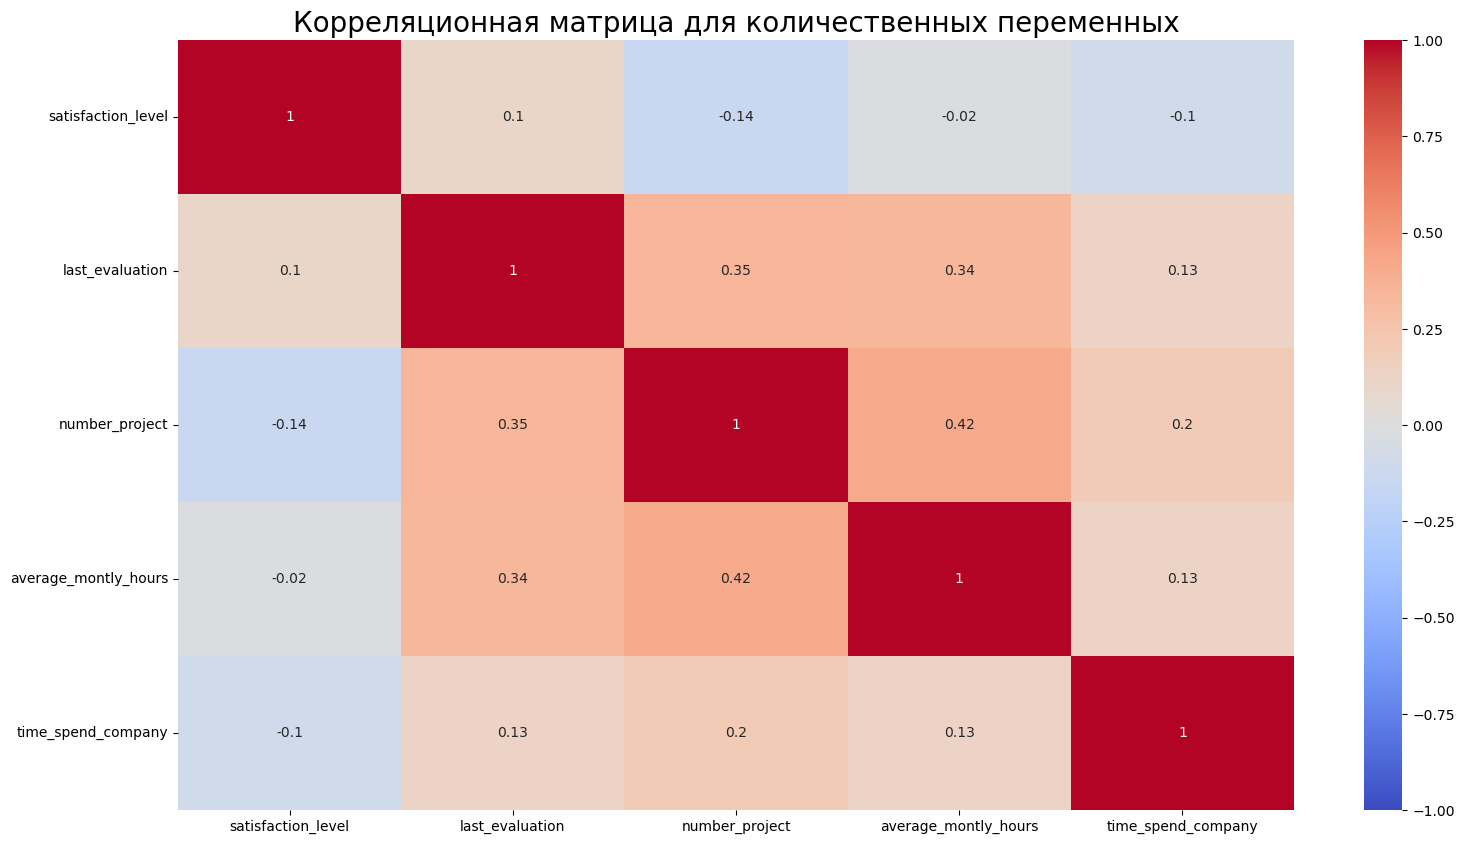

In [9]:
# lets build heat map TEST
plt.figure(figsize= (18, 10))
sns.heatmap(df_corr1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица для количественных переменных', fontsize=20)

###### Наибольшая корреляция:
- average_montly_hours и number_project 0.417
- last_evaluation и number_project 0.349
###### Наименьшая корреляция:
- average_montly_hours и satisfaction_level -0.02
- satisfaction_level и time_spend_company -0.101

In [19]:
df_corr2 = pd.DataFrame(index=df.columns, columns=df.columns)
# тут возьмём все столбцы, которые содержат количественные значения (включая Work_accident, left, promotion_last_5years)
for col1 in df.columns:
    if col1 != 'department' and col1 != 'salary':
        for col2 in df.columns:
            if col2 != 'department' and col2 != 'salary':
                df_corr2.loc[col1, col2] = round(df[col1].corr(df[col2]), 3)
                if col1 == col2:
                    df_corr2.loc[col1, col2] = 1.000
                
df_corr2.dropna(axis=1, how='all', inplace=True)
df_corr2.dropna(axis=0, how='all', inplace=True)

df_corr2 = df_corr2.astype('float64')

df_corr2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000,0.105,-0.143,-0.020,-0.101,0.059,-0.388,0.026
last_evaluation,0.105,1.000,0.349,0.340,0.132,-0.007,0.007,-0.009
number_project,-0.143,0.349,1.000,0.417,0.197,-0.005,0.024,-0.006
average_montly_hours,-0.020,0.340,0.417,1.000,0.128,-0.010,0.071,-0.004
time_spend_company,-0.101,0.132,0.197,0.128,1.000,0.002,0.145,0.067
Work_accident,0.059,-0.007,-0.005,-0.010,0.002,1.000,-0.155,0.039
left,-0.388,0.007,0.024,0.071,0.145,-0.155,1.000,-0.062
promotion_last_5years,0.026,-0.009,-0.006,-0.004,0.067,0.039,-0.062,1.000


Text(0.5, 1.0, 'Корреляционная матрица для всех переменных')

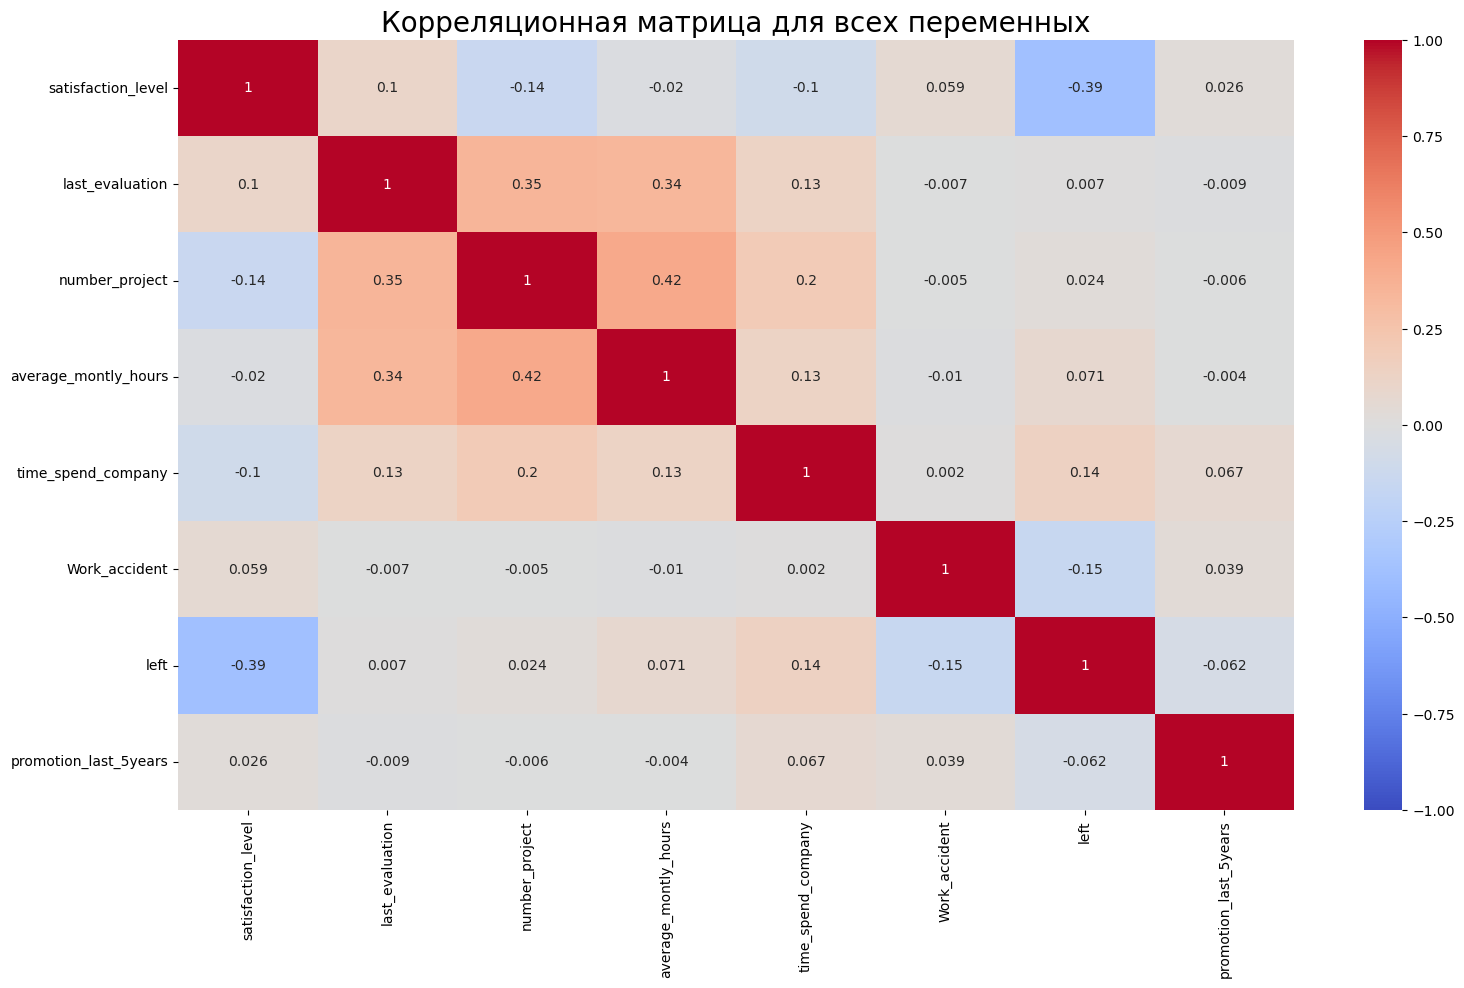

In [11]:
plt.figure(figsize= (18, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Корреляционная матрица для всех переменных', fontsize=20)

###### Наибольшая корреляция:
- average_montly_hours и number_project 0.417 - логичное заключение что загруженность коррелирует с выработкой
- left и satisfaction_level -0.38 - тоже вполне понятна отрицательная корреляция удовлетворённости и увольнения
###### Наименьшая корреляция:
- Work_accident и time_spend_company 0.002
- promotion_last_5years и average_montly_hours -0.004

### 4. Рассчитать сколько сотрудников работает в каждом департаменте.

In [7]:
df_staff = df.groupby('department')['department'].count().sort_values(ascending=False)
df_staff

department
sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

### 5. Показать распределение сотрудников по зарплатам.

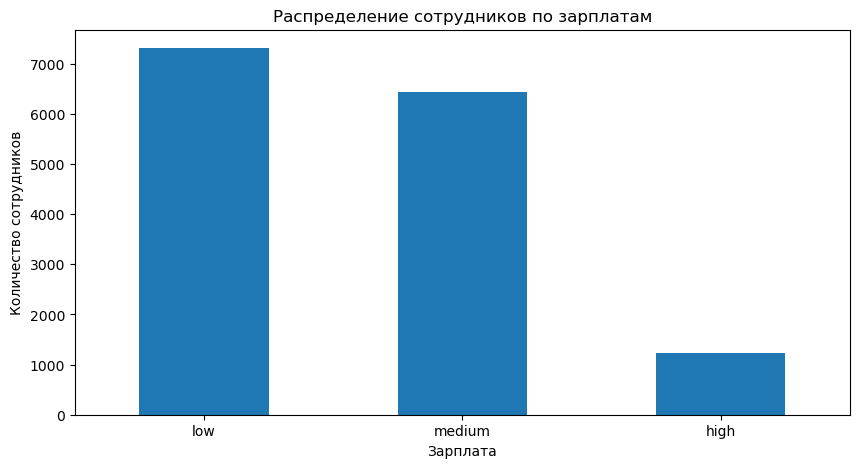

In [8]:
df_salary = df.groupby('salary')['salary'].count().sort_values(ascending=False)

df_salary.plot(kind='bar', figsize=(10, 5), title='Распределение сотрудников по зарплатам')
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.xticks(rotation=0)
plt.show()

### 6. Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.

In [9]:
# Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.
df_salary_department = df.groupby(['department', 'salary'])['salary'].count()

df_salary_department_tab = df_salary_department.unstack().T
df_salary_department_tab = df_salary_department_tab.reindex(df_salary_department_tab.index.tolist()[-2:] + df_salary_department_tab.index.tolist()[:-2])
df_salary_department_tab

department,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
salary,,,,,,,,,,
low,609,364,358,335,180,402,451,2099,1146,1372
medium,535,372,335,359,225,376,383,1772,942,1147
high,83,51,74,45,225,80,68,269,141,201


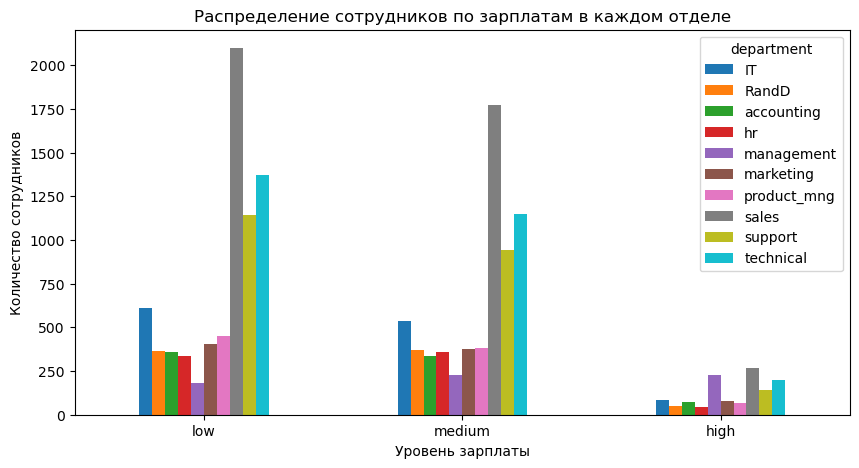

In [10]:
# построим графики в одной картинке для каждого департамента
df_salary_department_tab.plot(kind='bar',
                              figsize=(10, 5),
                              title='Распределение сотрудников по зарплатам в каждом отделе')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.xticks(rotation=0)
plt.show()

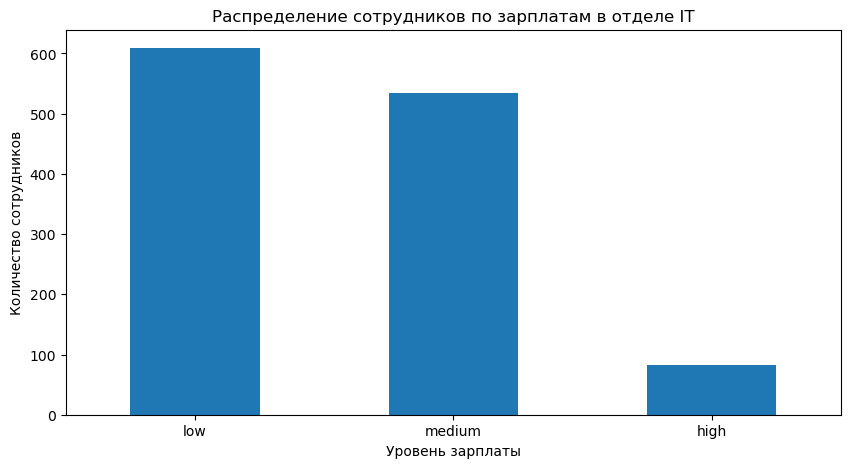

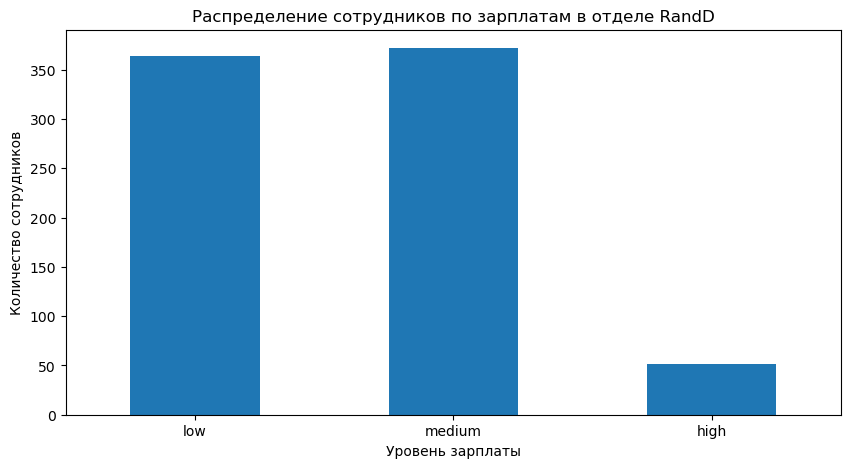

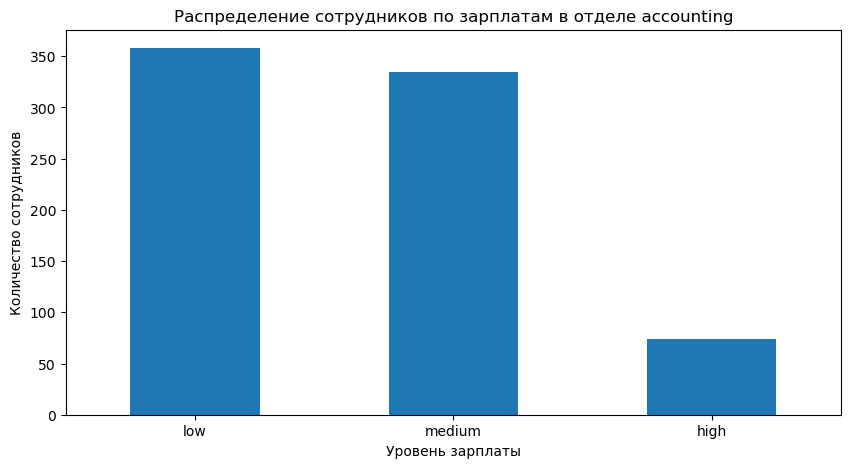

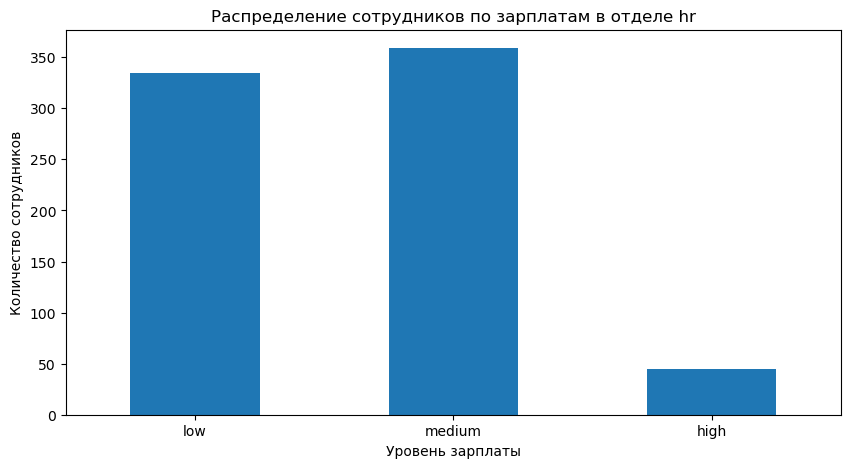

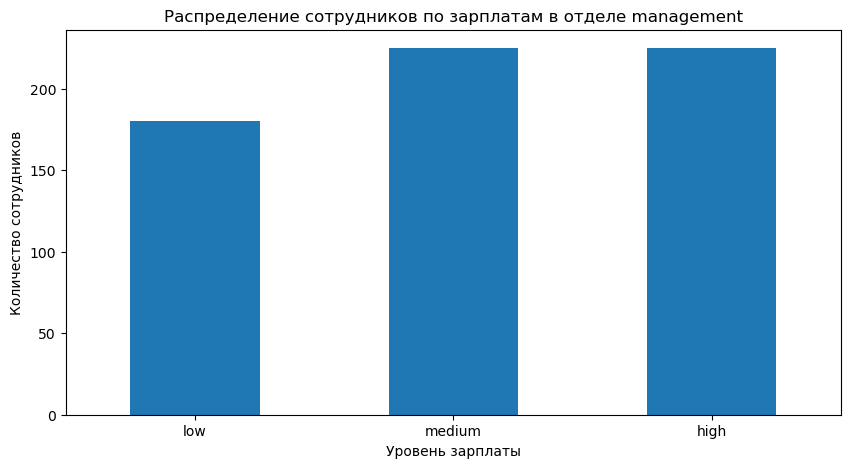

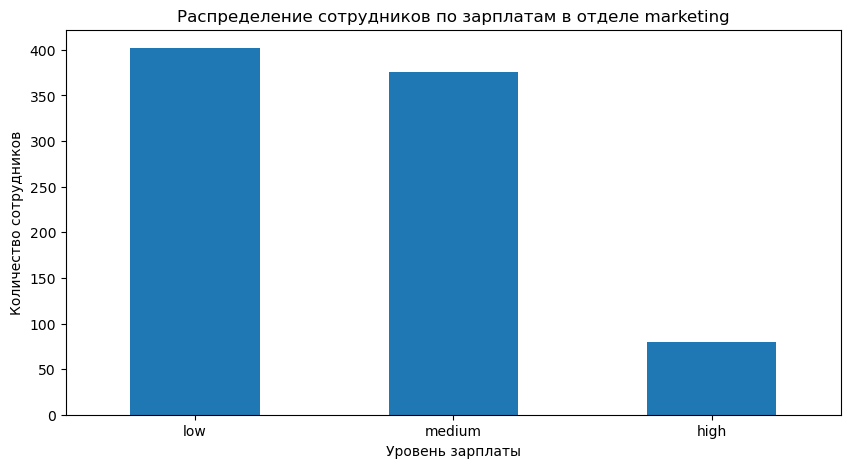

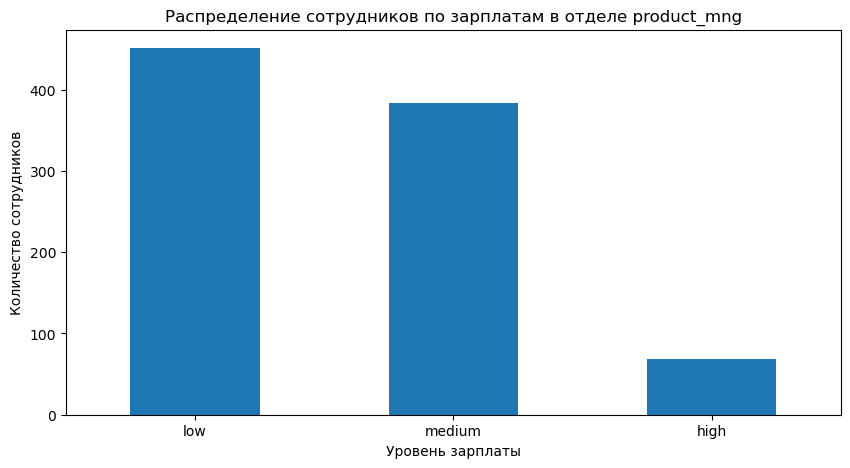

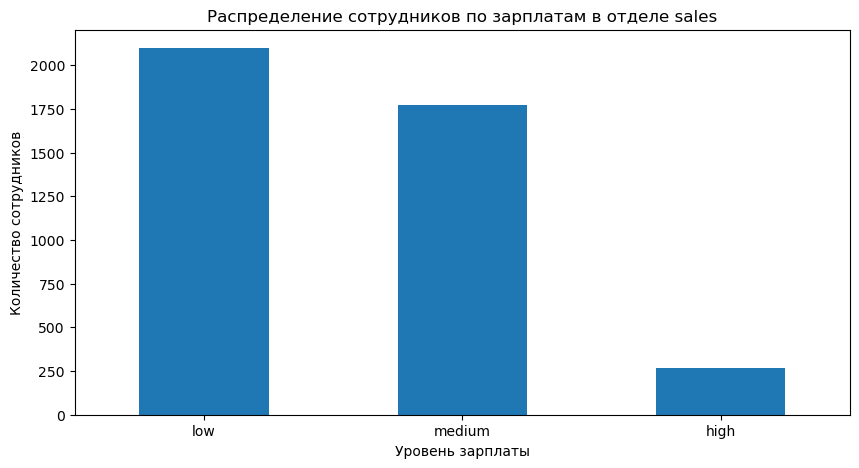

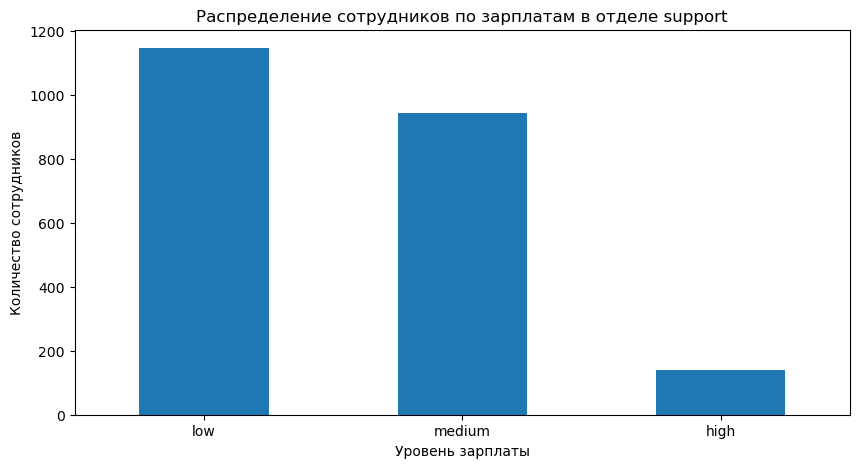

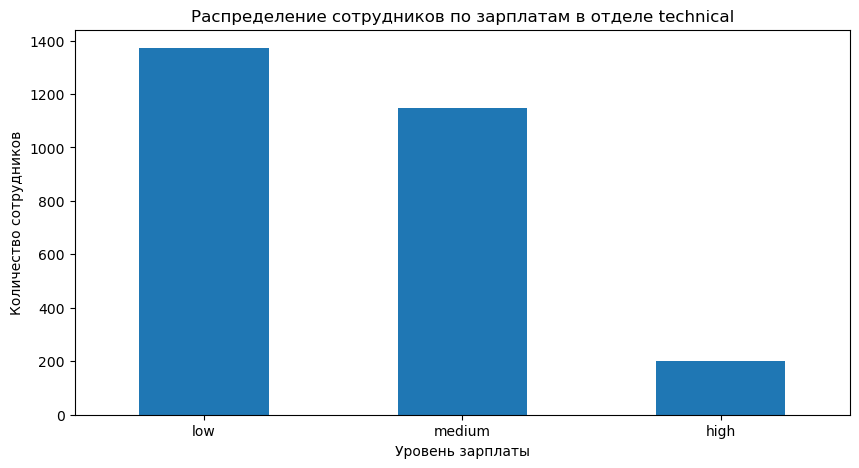

In [11]:
# покажем каждый отдел в своем графике
for col in df_salary_department_tab.columns:
    df_salary_department_tab[col].plot(kind='bar', figsize=(10, 5), title=f'Распределение сотрудников по зарплатам в отделе {col}')
    plt.xlabel('Уровень зарплаты')
    plt.ylabel('Количество сотрудников')
    plt.xticks(rotation=0)
    plt.show()

### 7. Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

In [12]:
df_salary = df.groupby('salary')['average_montly_hours'].median().sort_values(ascending=False)
df_salary

salary
medium    201.0
high      199.0
low       199.0
Name: average_montly_hours, dtype: float64

Мы видим, что количество часов проведённых на работе не зависит в большой степени от величины оклада. Гипотеза неверна.

Рассмотрим ситуацию в разрезе департаментов.

In [13]:
# посмотрим, сколько часов на работе в среднем по каждому отделу проводят сотрудники с низким окладом
df_low_salary = df[df['salary'] == 'low']
df_low_salary = df_low_salary.groupby('department')['average_montly_hours'].median()

# и с высоким окладом
df_high_salary = df[df['salary'] == 'high']
df_high_salary = df_high_salary.groupby('department')['average_montly_hours'].median()

In [14]:
# создадим таблицу где строками будут департаменты, а колонками медиана по average_montly_hours для 2х групп сотрудников: с salary low и high
df_work_hours = pd.DataFrame(index=df_low_salary.index, columns=['low', 'high'])
df_work_hours['low'] = df_low_salary
df_work_hours['high'] = df_high_salary

# создадим третий столбец, со значением 'гипотеза верна' если сумма в колонке low меньше high, иначе 'гипотеза неверна'
df_work_hours['res'] = df_work_hours.apply(lambda x: 'гипотеза верна' if x['low'] < x['high'] else 'гипотеза неверна', axis=1)
df_work_hours

,low,high,res
department,,,
IT,196.0,192.0,гипотеза неверна
RandD,194.0,201.0,гипотеза верна
accounting,198.0,208.0,гипотеза верна
hr,201.0,213.0,гипотеза верна
management,200.0,204.0,гипотеза верна
marketing,205.0,173.0,гипотеза неверна
product_mng,202.0,191.0,гипотеза неверна
sales,199.0,206.0,гипотеза верна
support,195.0,201.0,гипотеза верна


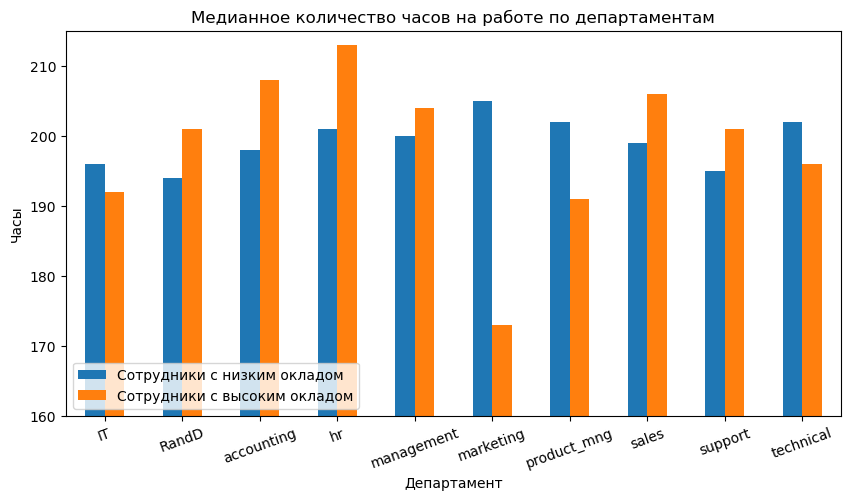

In [15]:
# построим график 2х групп сотрудников по среднему количеству часов на работе в департаменте
df_work_hours.plot(kind='bar', figsize=(10, 5), title='Медианное количество часов на работе по департаментам')
plt.ylim(160, 215)
plt.xlabel('Департамент')
plt.ylabel('Часы')
plt.xticks(rotation=20)
plt.legend( loc='lower left', labels=['Сотрудники с низким окладом', 'Сотрудники с высоким окладом'])
# plt.axhline(y=df_work_hours['low'].median(), color='b', linestyle='--', label='Медиана')

А вот здесь проявляются различия в отработанных часах: например, для отдела маркетинга гипотеза точно неверна. Но в большинстве отделов действительно сотрудники с низким окладом работают меньше, либо различия незначительны.

##### Общий вывод: если говорить обобщённо, гипотеа о том, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом неверна. Количество часов практически не отличается.

### 8. Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности).
- Доля сотрудников с повышением за последние 5 лет
- Средняя степень удовлетворенности
- Среднее количество проектов

In [16]:
df_promotion = df[df['promotion_last_5years'] == 1].groupby('left')['promotion_last_5years'].count()
print(f'Доля уволенных сотрудников с повышением за последние 5 лет: {df_promotion[1] / df.shape[0] * 100:.2f}%')
print(f'Доля работающих сотрудников с повышением за последние 5 лет: {df_promotion[0] / df.shape[0] * 100:.2f}%')

Доля уволенных сотрудников с повышением за последние 5 лет: 0.13%
Доля работающих сотрудников с повышением за последние 5 лет: 2.00%


Вывод напрашивается сам собой: если сотрудник получает повышение, вероятность того что он покинет компанию, снижается.

In [17]:
df_satisfaction = df.groupby('left')['satisfaction_level'].mean()
print(f'Средняя степень удовлетворенности по уволенным сотрудникам: {df_satisfaction[1]:.2f}')
print(f'Средняя степень удовлетворенности по работающим сотрудникам: {df_satisfaction[0]:.2f}')

Средняя степень удовлетворенности по уволенным сотрудникам: 0.44
Средняя степень удовлетворенности по работающим сотрудникам: 0.67


Тоже логичное заключение: сотрудники с низким уровнем удовлетворённости увольняются с большей вероятностью.

In [18]:
df_projects = df.groupby('left')['number_project'].mean()
print(f'Среднее количество проектов по уволенным сотрудникам: {df_projects[1]:.2f}')
print(f'Среднее количество проектов по работающим сотрудникам: {df_projects[0]:.2f}')

Среднее количество проектов по уволенным сотрудникам: 3.86
Среднее количество проектов по работающим сотрудникам: 3.79


У уволенных сотрудников в среднем было больше проектов, чем у тех, кто остался работать, но незначительно. Думаю, этот показатель не репрезентативен.

### 9. Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборки.

In [84]:
# TEST divide all columns to binary and non binary lists
binary_cols = []
non_binary_cols = []
for col in df.drop(['left', 'department', 'salary'], axis = 1).columns:
    if df[col].min() == 0 and df[col].max() == 1:
        binary_cols.append(col)
    else:
        non_binary_cols.append(col)

print(binary_cols)
print(non_binary_cols)

['Work_accident', 'promotion_last_5years']
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']


In [89]:
# X = all cols exlcuding 'left', 'department', 'salary'
X = df.drop(['left', 'department', 'salary'], axis = 1)
y = df['left']

In [96]:
# разделим данные на тестовую и обучающую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 11249
Размер тестовой выборки: 3750


In [102]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

X_test_st = scaler.transform(X_test)

X_train_st[:2]

array([[-0.93898571,  0.84081597,  1.78052591, -1.2438118 ,  1.71241959,
        -0.41091205, -0.14921337],
       [ 0.67015641,  1.24904848,  0.16004565,  0.48285204,  1.02799934,
        -0.41091205, -0.14921337]])

In [98]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_all_metrics(y_true, y_pred, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))

In [106]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state = 42)
lr_model.fit(X_train_st, y_train)
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
print_all_metrics(y_test, lr_predictions, title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.76
	Precision: 0.48
	Recall: 0.24
	F1: 0.32


LogisticRegression нам не очень подходит

In [107]:
from sklearn.ensemble import RandomForestClassifier

rf_model =  RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train_st, y_train)
rf_predictions =  rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
print_all_metrics(y_test, rf_predictions,  title = 'Метрики для модели случайного леса:')

Метрики для модели случайного леса:
	Accuracy: 0.99
	Precision: 0.99
	Recall: 0.96
	F1: 0.98


Метрики для RandomForestClassifier нас вполне устроят

In [234]:
# создадим новый датафрейм на 10 строк для проверки модели
df_new = df.drop(['left', 'department', 'salary'], axis = 1).iloc[:0]

# заполним 10 строками с рандомным значением похожим на значения из первоначального  датафрейма
for col in df_new.columns:
    if col in binary_cols:
        df_new[col] = np.random.choice([0, 1], size = 10)
    else:
        df_new[col] = np.random.uniform(df[col].min(), df[col].max(), size = 10)
df_new

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,0.999173,0.964541,4.752234,152.145535,5.534898,0,1
1,0.540359,0.713338,4.075041,176.529786,8.781888,1,1
2,0.968785,0.762045,2.618558,100.826982,8.331393,1,0
3,0.262374,0.875197,2.664543,203.974856,9.838627,1,1
4,0.774228,0.475079,6.571658,230.450831,7.231603,0,0
5,0.259872,0.438543,5.324126,100.920561,2.491182,0,1
6,0.486918,0.952586,4.230510,130.151426,4.898410,0,1
7,0.900677,0.658266,2.863371,200.768849,2.121903,0,0
8,0.873094,0.392561,4.012518,166.827893,7.572116,0,0
9,0.991090,0.781611,6.552815,115.036996,5.103769,0,1


In [235]:
# применим модель случайного леса для предсказания увольнения нового сотрудника и добавим это значение в колонку left
new_employees_predict = rf_model.predict(df_new)
print(f'Новый сотрудник будет уволен: {new_employees_predict}')

Новый сотрудник будет уволен: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


C:\Users\Hamster\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


### 10. Загрузить jupyter notebook с решением на github и прислать ссылку.

In [ ]:
link = 'https://raw.githubusercontent.com/...' 